In [1]:
import sys
import json
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

sys.path.insert(0, '../codes/')
from bulkmotion_utils import *

In [2]:
font_size = 10
w_cm      = 19       # max width of GRL figure [mm]
l_cm      = 11.5     # not used
cm2in     = 1/2.54   # mm to inches

plt.rcParams.update({'font.size': font_size})

In [3]:
datahome = '/net/kraken/nobak/ykliu/2022-BulkMotion/data'
picdir   = '/net/kraken/nobak/ykliu/2022-BulkMotion/pic'
my_json  = '/net/kraken/nobak/ykliu/2022-BulkMotion/inputs/brief.json'

## Read pre-defined paths
with open(my_json) as file:
    brief = json.load(file)

In [4]:
def symbol_cbar_velo(cmap, vlim=['-10', '10'], orient='horizontal', font_size=10, name='', picdir='.'):
    # Fig 3 velocity map colormap (mm/yr)
    if orient=='vertical':
        fig = plt.figure(figsize=(.07, .7))
        ax  = fig.add_axes([0.05, 0.05, 0.9, 0.9])
    elif orient=='horizontal':
        fig = plt.figure(figsize=(.7, .07))
        ax  = fig.add_axes([0.05, 0.05, 0.9, 0.9])        
    cbar = mpl.colorbar.ColorbarBase(ax, cmap=plt.get_cmap(cmap), orientation=orient, ticks=[0,1], extend='neither')
    cbar.ax.tick_params(which='both', direction='out', labelsize=font_size)    
    #ax.text(0.5,1.5, 'LOS velocity', ha='center')
    if orient=='vertical':
        cbar.ax.set_yticklabels(vlim)    
        cbar.set_label('[mm/yr]', fontsize=font_size, labelpad=-4, rotation=270)
    elif orient=='horizontal':
        cbar.ax.xaxis.set_ticks_position("top")
        cbar.ax.set_xticklabels(vlim)
        cbar.ax.xaxis.set_tick_params(pad=-2)
        cbar.set_label('[mm/yr]', fontsize=font_size, labelpad=-13)
    if picdir:
        fn = f"{picdir}/cbar_velo{name}.pdf"
        plt.savefig(fn, bbox_inches='tight', transparent=True, dpi=800, pad_inches=0.01)
        print('save to file: '+fn)
    plt.show()

    
def symbol_cbar_lat(cmap, vlim=['25', '32'], orient='horizontal', font_size=10, name='', picdir='.'):
    # Fig 3 velocity profile colormap (latitude deg)
    if orient=='vertical':
        fig = plt.figure(figsize=(.07, .7))
        ax  = fig.add_axes([0.05, 0.05, 0.9, 0.9])
    elif orient=='horizontal':
        fig = plt.figure(figsize=(.7, .07))
        ax  = fig.add_axes([0.05, 0.05, 0.9, 0.9])
    cbar = mpl.colorbar.ColorbarBase(ax, cmap=plt.get_cmap(cmap), orientation=orient, ticks=[0,1], extend='neither')
    cbar.ax.tick_params(which='both', direction='out', labelsize=font_size)
    #ax.text(0.5,1.5, 'Lat', ha='center')
    if orient=='vertical':
        cbar.ax.set_yticklabels(vlim)
        cbar.set_label(r'Lat [deg]', fontsize=font_size, labelpad=-4, rotation=270)
    elif orient=='horizontal':
        cbar.ax.xaxis.set_ticks_position("top")
        cbar.ax.set_xticklabels(vlim)
        cbar.ax.xaxis.set_tick_params(pad=-2)
        cbar.set_label(r'Lat [deg]', fontsize=font_size, labelpad=-13)
    if picdir:    
        fn = f"{picdir}/cbar_lat{name}.pdf"
        plt.savefig(fn, bbox_inches='tight', transparent=True, dpi=800, pad_inches=0.01)
        print('save to file: '+fn)
    plt.show()


def plot_insetprofs(dName, brief, w_cm, picdir='.', **kwargs):
    name, track = dName.split()
    v, range_g, Lats, Lons, demfile, atr = prepare_data_bm(brief[dName])
    
    if 'tick_p1' not in kwargs: kwargs['tick_p1']=None
    if 'tick_p2' not in kwargs: kwargs['tick_p2']=None
    if 'tick_p3' not in kwargs: kwargs['tick_p3']=None
    
    if kwargs['tick_p1']==None:
        if track.startswith('a'):   kwargs['tick_p1']=['in', 'in', -15, -8, True,  False, False, False, 'center', 'left']
        elif track.startswith('d'): kwargs['tick_p1']=['in', 'in', -15, -8, False, False, False, False, 'center', 'center']
    if kwargs['tick_p2']==None:
        if track.startswith('a'):   kwargs['tick_p2']=['in', 'in', -15, -8, False, False, False, False, 'center', 'center']
        elif track.startswith('d'): kwargs['tick_p2']=['in', 'in', -15, -8, False,  True, False, False, 'center', 'right']
    if kwargs['tick_p3']==None:
        kwargs['tick_p3']=['in', 'in', -15, -8, False, False, False, False, 'center', 'center']    
    
    for key in v:
        v[key] = remove_modes(v[key], N=10)
    v['Corrected velocity'] = v['Velocity2']-v['Plate motion']
    
    lat_min = np.nanmin(Lats)
    lat_max = np.nanmax(Lats)
    print('Latitude: {:.2f} / {:.2f}'.format(lat_min, lat_max))
    symbol_cbar_lat(kwargs['cmap'], vlim=[str(int(lat_min)), str(int(lat_max))], font_size=8, name='_'+track, picdir=picdir)
    kwargs['clim']      = [lat_min, lat_max]
    
    #-------- before
    kwargs['subplot_w']   = w_cm*cm2in
    kwargs['subplot_h']   = w_cm*cm2in * .7
    kwargs['titstr']      = ''
    kwargs['ticks']       = True
    kwargs['tick_params'] = kwargs['tick_p1']
    fn = f"{picdir}/{name}_{track}_rb.png"
    plot_rampprof(data1=v['Velocity2'], data2=None, range_dist=range_g, latitude=Lats, super_title=None, outfile=fn, **kwargs)

    #-------- after
    kwargs['subplot_w']   = w_cm*cm2in
    kwargs['subplot_h']   = w_cm*cm2in * .7    
    kwargs['titstr']      = ''
    kwargs['ticks']       = True
    kwargs['tick_params'] = kwargs['tick_p2']    
    fn = f"{picdir}/{name}_{track}_ra.png"
    plot_rampprof(data1=v['Corrected velocity'], data2=None, range_dist=range_g, latitude=Lats, super_title=None, outfile=fn, **kwargs)

    #-------- PMM
    kwargs['subplot_w']   = w_cm*cm2in * 0.4348
    kwargs['subplot_h']   = w_cm*cm2in * .7
    kwargs['titstr']      = ''
    kwargs['ticks']       = False
    kwargs['tick_params'] = kwargs['tick_p3']    
    kwargs['slope_leg']   = 'newline'
    fn = f"{picdir}/{name}_{track}_rm.png"
    plot_rampprof(data1=v['Plate motion'], data2=None, range_dist=range_g, latitude=Lats, super_title=None, outfile=fn, **kwargs)        
    

def make_insetmaps(dName, brief, w_cm, l_cm, picdir='.', **kwargs):
    name, track = dName.split()
    v, range_g, Lats, Lons, demfile, atr = prepare_data_bm(brief[dName])
    
    if 'tick_p1' not in kwargs: kwargs['tick_p1']=None
    if 'tick_p2' not in kwargs: kwargs['tick_p2']=None
    if 'tick_p3' not in kwargs: kwargs['tick_p3']=None    
    
    if kwargs['tick_p1']==None:
        if track.startswith('a') or track.startswith('d046'):    kwargs['tick_p1']=['in', -15, -35, True, False, True, False, 'center', 'center']
        elif track.startswith('d') and track.startswith('d119'): kwargs['tick_p1']=['in', -12, -8, False, False, True, False, 'center', 'center']
        else:                                                    kwargs['tick_p1']=['in', -15, -35, False, False, True, False, 'center', 'center']
    if kwargs['tick_p2']==None:
        if track.startswith('a') or track.startswith('d046'):    kwargs['tick_p2']=['in', -15, -35, False, False, True, False, 'center', 'center']
        elif track.startswith('d') and track.startswith('d119'): kwargs['tick_p2']=['in', -15, -35, False, True, True, False, 'right', 'center']
        else:                                                    kwargs['tick_p2']=['in', -15, -35, False, True, True, False, 'center', 'center']
    if kwargs['tick_p3']==None:
        kwargs['tick_p3']=['in', -15, -35, False, False, False, False, 'center', 'center']
    
    vmin, vmax = kwargs['vlims']
    symbol_cbar_velo(kwargs['cmap'], vlim=[str(int(vmin)), str(int(vmax))], font_size=8, name='_'+track, picdir=picdir)
        
        
    #-------- before
    kwargs['tick_params'] = kwargs['tick_p1']
    kwargs['subplot_w'] = w_cm*cm2in
    kwargs['subplot_h'] = l_cm*cm2in
    show_list = ['Velocity2']
    titles    = False
    f_suff    = 'vb'
    v_show    = {ikey: v[ikey] for ikey in show_list}
    fn = f"{picdir}/{name}_{track}_{f_suff}.png"
    plot_imgs(v_show, atr, demfile, titles=titles, super_title=None, outfile=fn, **kwargs)


    #-------- after
    kwargs['tick_params'] = kwargs['tick_p2']
    kwargs['subplot_w'] = w_cm*cm2in
    kwargs['subplot_h'] = l_cm*cm2in    
    show_list = ['Corrected velocity']
    titles    = False
    f_suff    = 'va'
    v_show    = {ikey: v[ikey] for ikey in show_list}
    fn = f"{picdir}/{name}_{track}_{f_suff}.png"
    plot_imgs(v_show, atr, demfile, titles=titles, super_title=None, outfile=fn, **kwargs)


    #-------- PMM
    kwargs['tick_params'] = kwargs['tick_p3']
    kwargs['subplot_w'] = w_cm*cm2in * 0.4348
    kwargs['subplot_h'] = l_cm*cm2in * 0.4348
    show_list = ['Plate motion']
    titles    = False
    f_suff    = 'vm'
    v_show    = {ikey: v[ikey] for ikey in show_list}
    fn = f"{picdir}/{name}_{track}_{f_suff}.png"
    plot_imgs(v_show, atr, demfile, titles=titles, super_title=None, outfile=fn, **kwargs)        

# Figure 3

## Making all the insets for Fig.3 in the maintext. Use *Illustrator* to mosaic all insets

prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_a086_Geo.h5
Latitude: 24.89 / 32.00
save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/cbar_lat_a086.pdf


Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 257.52603
Valid (non-nan pixels) ground range min/max: 0.7483125 257.50296
Ground range distance spans 256.8 km
Figure ext:png dpi:800 W/H:1417.32/992.13
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/Makran_a086_rb.png


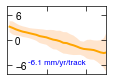

Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 257.52603
Valid (non-nan pixels) ground range min/max: 0.7483125 257.50296
Ground range distance spans 256.8 km
Figure ext:png dpi:800 W/H:1417.32/992.13
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/Makran_a086_ra.png


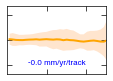

Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 257.52603
Valid (non-nan pixels) ground range min/max: 0.0 257.52603
Ground range distance spans 257.5 km
Figure ext:png dpi:800 W/H:616.25/992.13
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/Makran_a086_rm.png


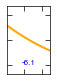

prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_d020_Geo.h5
Latitude: 25.10 / 32.00
save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/cbar_lat_d020.pdf


Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 257.334
Valid (non-nan pixels) ground range min/max: 0.17575 256.69208
Ground range distance spans 256.5 km
Figure ext:png dpi:800 W/H:1417.32/992.13
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/Makran_d020_rb.png


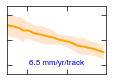

Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 257.334
Valid (non-nan pixels) ground range min/max: 0.17575 256.69208
Ground range distance spans 256.5 km
Figure ext:png dpi:800 W/H:1417.32/992.13
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/Makran_d020_ra.png


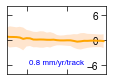

Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 257.334
Valid (non-nan pixels) ground range min/max: 0.0 257.334
Ground range distance spans 257.3 km
Figure ext:png dpi:800 W/H:616.25/992.13
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/Makran_d020_rm.png


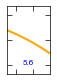

prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_a087_Geo.h5
Latitude: 26.17 / 33.33
save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/cbar_lat_a087.pdf


Range ramp scatter plot shifted by median -2.9802322387695312e-08
Ground range min/max: 0.0 255.40157
Valid (non-nan pixels) ground range min/max: 0.929375 252.75
Ground range distance spans 251.8 km
Figure ext:png dpi:800 W/H:1417.32/992.13
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/Aqaba_a087_rb.png


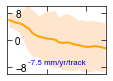

Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 255.40157
Valid (non-nan pixels) ground range min/max: 0.929375 252.75
Ground range distance spans 251.8 km
Figure ext:png dpi:800 W/H:1417.32/992.13
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/Aqaba_a087_ra.png


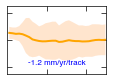

Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 255.40157
Valid (non-nan pixels) ground range min/max: 0.0 255.40157
Ground range distance spans 255.4 km
Figure ext:png dpi:800 W/H:616.25/992.13
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/Aqaba_a087_rm.png


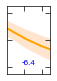

prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_d021_Geo.h5
Latitude: 26.43 / 34.17
save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/cbar_lat_d021.pdf


Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 257.00183
Valid (non-nan pixels) ground range min/max: 1.7585938 254.00235
Ground range distance spans 252.2 km
Figure ext:png dpi:800 W/H:1417.32/992.13
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/Aqaba_d021_rb.png


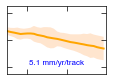

Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 257.00183
Valid (non-nan pixels) ground range min/max: 1.7585938 254.00235
Ground range distance spans 252.2 km
Figure ext:png dpi:800 W/H:1417.32/992.13
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/Aqaba_d021_ra.png


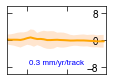

Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 257.00183
Valid (non-nan pixels) ground range min/max: 0.0 257.00183
Ground range distance spans 257.0 km
Figure ext:png dpi:800 W/H:616.25/992.13
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/Aqaba_d021_rm.png


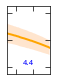

prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d119_Geo.h5
Latitude: -28.83 / -22.24
save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/cbar_lat_d119.pdf


Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 253.31784
Valid (non-nan pixels) ground range min/max: 1.0149063 251.99696
Ground range distance spans 251.0 km
Figure ext:png dpi:800 W/H:1417.32/992.13
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/Australia_d119_rb.png


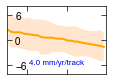

Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 253.31784
Valid (non-nan pixels) ground range min/max: 1.0149063 251.99696
Ground range distance spans 251.0 km
Figure ext:png dpi:800 W/H:1417.32/992.13
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/Australia_d119_ra.png


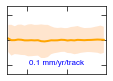

Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 253.31784
Valid (non-nan pixels) ground range min/max: 0.0 253.31784
Ground range distance spans 253.3 km
Figure ext:png dpi:800 W/H:616.25/992.13
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/Australia_d119_rm.png


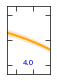

prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d046_Geo.h5
Latitude: -27.63 / -22.53
save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/cbar_lat_d046.pdf


Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 253.3031
Valid (non-nan pixels) ground range min/max: 1.0349687 251.34735
Ground range distance spans 250.3 km
Figure ext:png dpi:800 W/H:1417.32/992.13
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/Australia_d046_rb.png


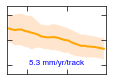

Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 253.3031
Valid (non-nan pixels) ground range min/max: 1.0349687 251.34735
Ground range distance spans 250.3 km
Figure ext:png dpi:800 W/H:1417.32/992.13
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/Australia_d046_ra.png


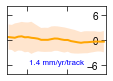

Range ramp scatter plot shifted by median 0.0
Ground range min/max: 0.0 253.3031
Valid (non-nan pixels) ground range min/max: 0.0 253.3031
Ground range distance spans 253.3 km
Figure ext:png dpi:800 W/H:616.25/992.13
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2/Australia_d046_rm.png


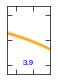

In [5]:
## Start insets
picdir    = '/net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2'
font_size = 10
w_cm      = 4.5      # width of figure [cm]
l_cm      = 11.5     # not used
cm2in     = 1/2.54   # cm to inches
dpi       = 800
plt.rcParams.update({'font.size': font_size})


## the common kwargs
kwargs = dict()
kwargs['style']       = 'fill'
kwargs['cmap']        = 'viridis_r' #'GnBu'
kwargs['title_pad']   = 4.
kwargs['range_type']  = 'Ground'
kwargs['xticks']      = [100,200]
kwargs['alpha']       = 0.4
kwargs['dpi']         = dpi
kwargs['font_size']   = font_size
kwargs['slope_leg']   = True


## Let's plot all datasets
dName = 'Makran a086'
kwargs['vlim']        = [-8,8]
plot_insetprofs(dName, brief, w_cm, picdir, **kwargs)

dName = 'Makran d020'
kwargs['vlim']        = [-8,8]
plot_insetprofs(dName, brief, w_cm, picdir, **kwargs)

dName = 'Aqaba a087'
kwargs['vlim']        = [-10,10]
plot_insetprofs(dName, brief, w_cm, picdir, **kwargs)

dName = 'Aqaba d021'
kwargs['vlim']        = [-10,10]
plot_insetprofs(dName, brief, w_cm, picdir, **kwargs)

dName = 'Australia d119'
kwargs['vlim']        = [-8,8]
kwargs['tick_p1']     = ['in', 'in', -15, -8, True,  False, False, False, 'center', 'left']
kwargs['tick_p2']     = ['in', 'in', -15, -8, False, False, False, False, 'center', 'center']
plot_insetprofs(dName, brief, w_cm, picdir, **kwargs)

dName = 'Australia d046'
kwargs['vlim']        = [-8,8]
kwargs['tick_p1']     = None
kwargs['tick_p2']     = None
plot_insetprofs(dName, brief, w_cm, picdir, **kwargs)

In [7]:
## Start insets
picdir    = '/net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets2'
font_size = 10
w_cm      = 4.5          # width of inset [cm]
l_cm      = w_cm*1.771   # length of inset
cm2in     = 1/2.54       # cm to inches
dpi       = 800
plt.rcParams.update({'font.size': font_size})


kwargs = dict()
kwargs['aspect']    = 'auto'
kwargs['font_size'] = font_size
kwargs['laloStep']  = 2
kwargs['title_pad'] = 4
kwargs['suptity']   = 0.1
kwargs['alpha']     = 0.85
kwargs['refpoint']  = False
kwargs['dpi']       = dpi
kwargs['cmap']      = 'RdYlBu_r'
kwargs['cbox_loc']  = False
kwargs['sbox_loc']  = False
kwargs['tbox_loc']  = False
kwargs['coast_lw']  = 0.3
kwargs['constrain'] = False

prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_a086_Geo.h5
save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/cbar_velo_a086.pdf


Plot data no. 1: <Velocity2>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_a086_vel.h5 velocity --fontsize 10 -u mm -v -5 5 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_a086.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.02 --shade-min -6000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.3 --noreference
Figure ext:png dpi:800 W/H:1417.32/2510.08
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/Makran_a086_vb.png


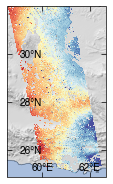

Plot data no. 1: <Corrected velocity>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_a086_vel.h5 velocity --fontsize 10 -u mm -v -5 5 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_a086.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.02 --shade-min -6000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.3 --noreference
Figure ext:png dpi:800 W/H:1417.32/2510.08
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/Makran_a086_va.png


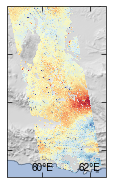

Plot data no. 1: <Plate motion>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_a086_vel.h5 velocity --fontsize 10 -u mm -v -5 5 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_a086.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.02 --shade-min -6000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.3 --noreference
Figure ext:png dpi:800 W/H:616.25/1091.38
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/Makran_a086_vm.png


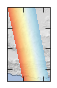

prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_d020_Geo.h5
save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/cbar_velo_d020.pdf


Plot data no. 1: <Velocity2>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_d020_vel.h5 velocity --fontsize 10 -u mm -v -5 5 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_d020.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.02 --shade-min -6000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.3 --noreference
Figure ext:png dpi:800 W/H:1417.32/2510.08
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/Makran_d020_vb.png


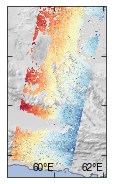

Plot data no. 1: <Corrected velocity>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_d020_vel.h5 velocity --fontsize 10 -u mm -v -5 5 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_d020.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.02 --shade-min -6000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.3 --noreference
Figure ext:png dpi:800 W/H:1417.32/2510.08
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/Makran_d020_va.png


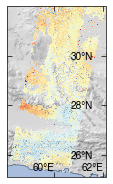

Plot data no. 1: <Plate motion>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_d020_vel.h5 velocity --fontsize 10 -u mm -v -5 5 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_d020.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.02 --shade-min -6000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.3 --noreference
Figure ext:png dpi:800 W/H:616.25/1091.38
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/Makran_d020_vm.png


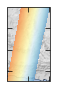

prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_a087_Geo.h5
save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/cbar_velo_a087.pdf


Plot data no. 1: <Velocity2>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_a087_vel.h5 velocity --fontsize 10 -u mm -v -8 8 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_a087.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.04 --shade-min -6000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.3 --noreference
Figure ext:png dpi:800 W/H:1417.32/2510.08
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/Aqaba_a087_vb.png


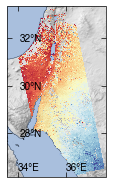

Plot data no. 1: <Corrected velocity>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_a087_vel.h5 velocity --fontsize 10 -u mm -v -8 8 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_a087.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.04 --shade-min -6000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.3 --noreference
Figure ext:png dpi:800 W/H:1417.32/2510.08
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/Aqaba_a087_va.png


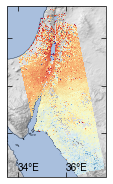

Plot data no. 1: <Plate motion>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_a087_vel.h5 velocity --fontsize 10 -u mm -v -8 8 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_a087.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.04 --shade-min -6000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.3 --noreference
Figure ext:png dpi:800 W/H:616.25/1091.38
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/Aqaba_a087_vm.png


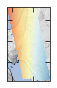

prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_d021_Geo.h5
save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/cbar_velo_d021.pdf


Plot data no. 1: <Velocity2>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_d021_vel.h5 velocity --fontsize 10 -u mm -v -8 8 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_d021.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.04 --shade-min -6000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.3 --noreference
Figure ext:png dpi:800 W/H:1417.32/2510.08
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/Aqaba_d021_vb.png


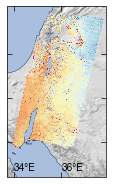

Plot data no. 1: <Corrected velocity>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_d021_vel.h5 velocity --fontsize 10 -u mm -v -8 8 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_d021.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.04 --shade-min -6000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.3 --noreference
Figure ext:png dpi:800 W/H:1417.32/2510.08
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/Aqaba_d021_va.png


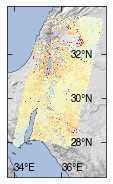

Plot data no. 1: <Plate motion>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_d021_vel.h5 velocity --fontsize 10 -u mm -v -8 8 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_d021.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.04 --shade-min -6000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.3 --noreference
Figure ext:png dpi:800 W/H:616.25/1091.38
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/Aqaba_d021_vm.png


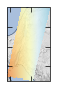

prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d119_Geo.h5
save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/cbar_velo_d119.pdf


Plot data no. 1: <Velocity2>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d119_vel.h5 velocity --fontsize 10 -u mm -v -5 5 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d119.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.9 --shade-exag 0.1 --shade-min -7000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.3 --noreference
Figure ext:png dpi:800 W/H:1417.32/2510.08
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/Australia_d119_vb.png


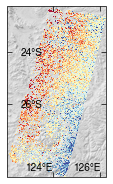

Plot data no. 1: <Corrected velocity>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d119_vel.h5 velocity --fontsize 10 -u mm -v -5 5 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d119.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.9 --shade-exag 0.1 --shade-min -7000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.3 --noreference
Figure ext:png dpi:800 W/H:1417.32/2510.08
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/Australia_d119_va.png


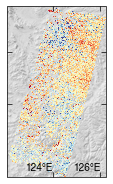

Plot data no. 1: <Plate motion>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d119_vel.h5 velocity --fontsize 10 -u mm -v -5 5 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d119.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.9 --shade-exag 0.1 --shade-min -7000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.3 --noreference
Figure ext:png dpi:800 W/H:616.25/1091.38
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/Australia_d119_vm.png


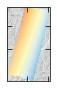

prepare range distance in geo-coordinates from file: /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d046_Geo.h5
save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/cbar_velo_d046.pdf


Plot data no. 1: <Velocity2>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d046_vel.h5 velocity --fontsize 10 -u mm -v -5 5 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d046.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.9 --shade-exag 0.1 --shade-min -7000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.3 --noreference
Figure ext:png dpi:800 W/H:1417.32/2510.08
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/Australia_d046_vb.png


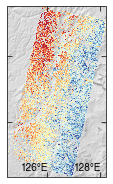

Plot data no. 1: <Corrected velocity>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d046_vel.h5 velocity --fontsize 10 -u mm -v -5 5 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d046.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.9 --shade-exag 0.1 --shade-min -7000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.3 --noreference
Figure ext:png dpi:800 W/H:1417.32/2510.08
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/Australia_d046_va.png


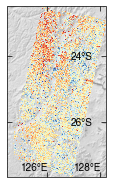

Plot data no. 1: <Plate motion>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d046_vel.h5 velocity --fontsize 10 -u mm -v -5 5 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d046.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.9 --shade-exag 0.1 --shade-min -7000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.3 --noreference
Figure ext:png dpi:800 W/H:616.25/1091.38
Save to file: /net/kraken/nobak/ykliu/2022-BulkMotion/pic/insets/Australia_d046_vm.png


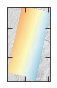

In [8]:
##################  Makran  ####################
kwargs['shadeExg']  = 0.02
kwargs['shadeMin']  = -6e3
kwargs['shadeMax']  =  5e3
kwargs['vlims']     = [-5,5]
kwargs['yticks']    = [26, 28, 30]

dName = 'Makran a086'
kwargs['tick_p1']=None
kwargs['tick_p2']=None
make_insetmaps(dName, brief, w_cm, l_cm, picdir, **kwargs)

dName = 'Makran d020'
kwargs['tick_p1']=['in', -15, -35, False, False, True, False, 'right', 'center']
kwargs['tick_p2']=['in', -15, -35, False,  True, True, False, 'right', 'center']
make_insetmaps(dName, brief, w_cm, l_cm, picdir, **kwargs)



##################  Aqaba  ####################
kwargs['shadeExg']  = 0.04
kwargs['shadeMin']  = -6e3
kwargs['shadeMax']  =  5e3
kwargs['vlims']     = [-8,8]
kwargs['yticks']    = [28, 30, 32]

dName = 'Aqaba a087'
kwargs['tick_p1']=['in', -15, -35, True,  False, True, False, 'left', 'center']
kwargs['tick_p2']=['in', -15, -35, False, False, True, False, 'left', 'center']
make_insetmaps(dName, brief, w_cm, l_cm, picdir, **kwargs)

dName = 'Aqaba d021'
kwargs['tick_p1']=['in', -15, -35, False, False, True, False, 'left', 'center']
kwargs['tick_p2']=['in', -15, -35, False,  True, True, False, 'left', 'center']
make_insetmaps(dName, brief, w_cm, l_cm, picdir, **kwargs)



##################  Australia  ####################
kwargs['lakes']     = False
kwargs['alpha']     = 0.90
kwargs['shadeExg']  = 0.10
kwargs['shadeMin']  = -7e3
kwargs['shadeMax']  =  5e3
kwargs['vlims']     = [-5,5]
kwargs['yticks']    = [-26, -24]

dName = 'Australia d119'
kwargs['tick_p1']=['in', -15, -35, True,  False, True, False, 'right', 'center']
kwargs['tick_p2']=['in', -15, -35, False, False, True, False, 'right', 'center']
make_insetmaps(dName, brief, w_cm, l_cm, picdir, **kwargs)

dName = 'Australia d046'
kwargs['tick_p1']=['in', -15, -35, False, False, True, False, 'right', 'center']
kwargs['tick_p2']=['in', -15, -35, False,  True, True, False, 'right', 'center']
make_insetmaps(dName, brief, w_cm, l_cm, picdir, **kwargs)

# Make separate colorbars

In [6]:
symbol_cbar_velo(cmap='RdBu', vlim=['-10', '10'], orient='horizontal', font_size=8, name='', picdir=False)
symbol_cbar_lat(cmap='viridis', vlim=['25', '32'], orient='horizontal', font_size=8, name='', picdir=False)